# End-to-End Regression Challenge

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

import joblib

In [2]:
# Load dataset from csv file
df = pd.read_csv("../DATA/house_price_prediction_data.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
# Check for missing values
df.isnull().sum().sum()

0

In [4]:
# Check for shape of dataset
df.shape

(414, 8)

In [5]:
# Check for duplicates
df.duplicated().sum()

0


#### Continuous values takes infinite values betweeen two points

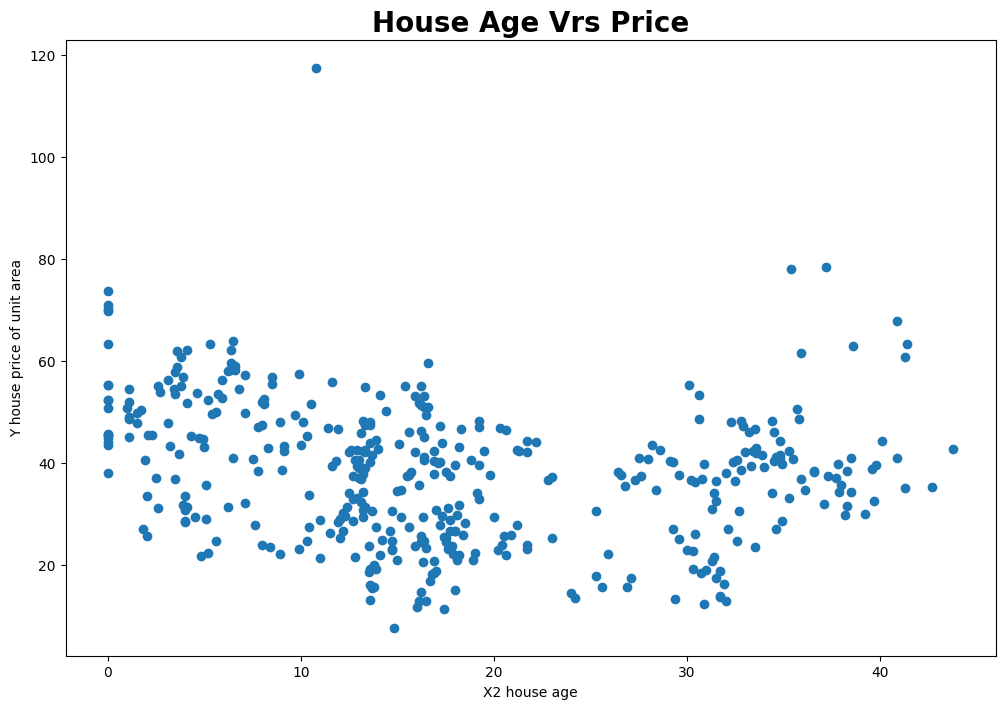

In [6]:
# Scatter plot X2 and Y
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(x='X2 house age',y='Y house price of unit area',data=df)
ax.set(xlabel='X2 house age',ylabel='Y house price of unit area')
plt.title(label="House Age Vrs Price",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

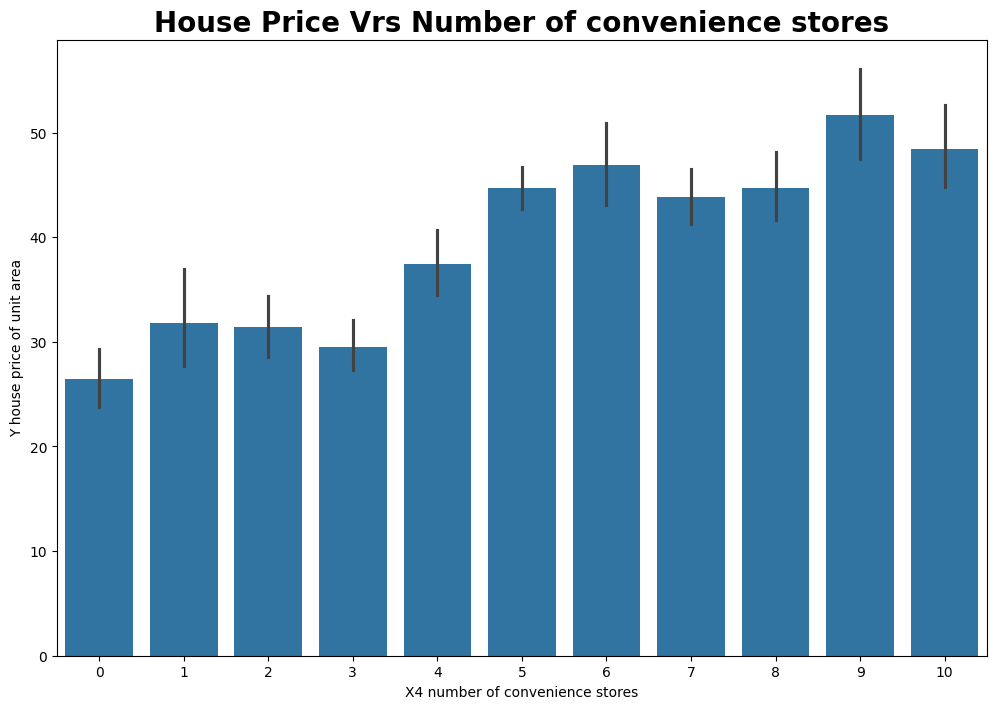

In [7]:
# Barplot of Number of convenience stores and house price
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(x="X4 number of convenience stores", y="Y house price of unit area",
            data=df,ax=ax)
plt.title(label="House Price Vrs Number of convenience stores",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

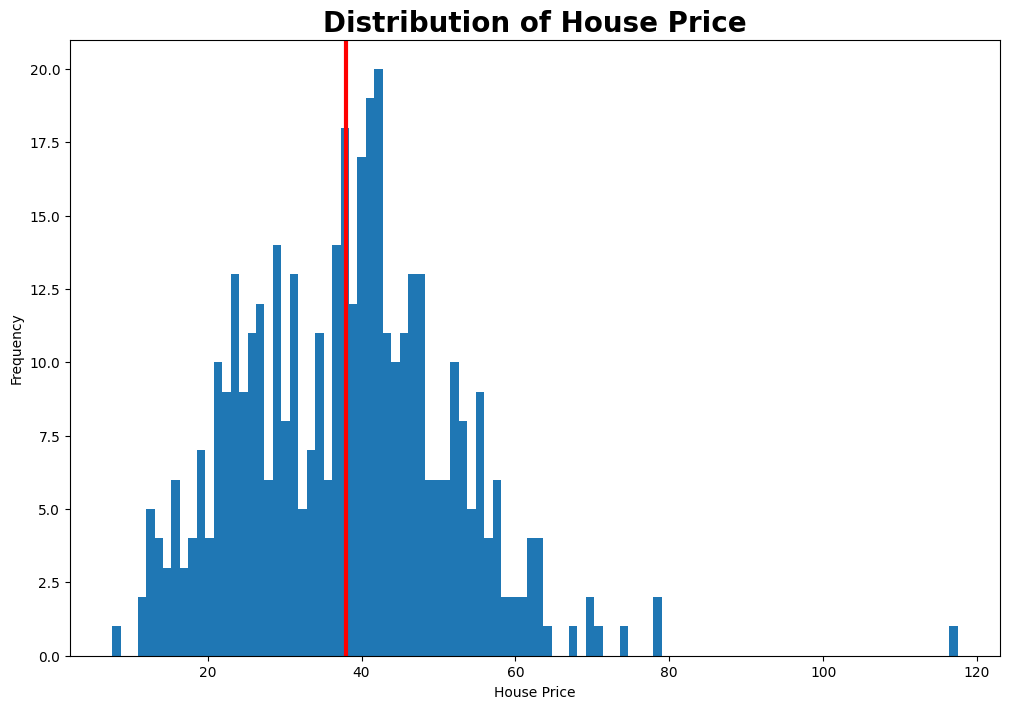

In [8]:
# Distribution of House Price

# Compute mean house price
mean_house_price = df['Y house price of unit area'].mean()

fig,ax = plt.subplots(figsize=(12,8))
ax.hist(x=df['Y house price of unit area'],bins=100)
plt.axvline(x=mean_house_price,color="Red",ls="solid",linewidth=3)
ax.set(xlabel="House Price",ylabel="Frequency")
plt.title(label="Distribution of House Price",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

In [9]:
# Make copy of df
df_copy = df.copy()

In [10]:
# Dropping outliers
df_copy = df_copy[df_copy['Y house price of unit area']<115]

In [11]:
# Dropping No column
df_copy = df_copy.drop(columns=['No'])
df_copy.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [12]:
# Extract Year from X1
def extract_year(column):
    column = column.astype('str')
    
    df_copy[["X1 Transaction Year","Date"]] = column.str.split(".",expand=True).astype(int)
    df_copy.drop(columns=["X1 transaction date","Date"],inplace=True)
    return df_copy.head()

extract_year(df_copy['X1 transaction date'])

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,X1 Transaction Year
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012


In [13]:
# Shuffles the df_copy
df_shuffled = shuffle(df_copy,random_state=42)
df_shuffled.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,X1 Transaction Year
395,21.2,512.5487,4,24.97400,121.53842,42.5,2012
350,13.2,492.2313,5,24.96515,121.53737,42.3,2013
401,7.6,2175.0300,3,24.96305,121.51254,27.7,2013
354,12.2,1360.1390,1,24.95204,121.54842,30.1,2013
181,11.6,201.8939,8,24.98489,121.54121,55.9,2013


In [14]:
# Separate the df_shuffled into features and label

# Features
X = df_shuffled.drop(columns=["Y house price of unit area"])
# Label
y = df_shuffled['Y house price of unit area']

# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=42)


In [15]:
# Scale the data
ssc = StandardScaler()

# Fit and transform the data
X_train = ssc.fit_transform(X_train)
X_test = ssc.transform(X_test)

In [16]:
# Initalise the model
lg = LinearRegression()

# Train the model
lg.fit(X_train,y_train)

LinearRegression()

In [17]:
# Score the model
y_pred = lg.predict(X_test)

r2_scored = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print(f"The r2 score of the model is {r2_scored:.2f}")
print(f"The mean squared error of the model is {mse:.2f}")

The r2 score of the model is 0.79
The mean squared error of the model is 36.99


In [18]:
# Initialize the model again
lg2 = LinearRegression()

# Train and test the model
r2_scored2 = cross_val_score(lg2,X=X,y=y,
                             cv=10,scoring='r2')
print(f"The r2 score of the model is {r2_scored2.mean():.2f}")


The r2 score of the model is 0.60


In [19]:
# Save the trained model
joblib.dump(lg,"../MODEL/lg_model.joblib")

['../MODEL/lg_model.joblib']

In [20]:
# Load the model
lg_loaded = joblib.load("../MODEL/lg_model.joblib")

# Make predictions
model_pred = lg_loaded.predict(X_test)
model_pred

array([24.76124507, 10.48409281, 43.8407566 , 34.9948397 , 45.17045233,
       35.85724934, 53.08540062, 50.2161449 , 29.79742865, 36.82252414,
       37.28671272, 32.40554271, 43.4600105 , 43.89574929, 52.48552544,
       48.09394622, 35.8484485 , 45.73320646, 33.92462679, 50.84447113,
       31.49251078, 39.58939708, 15.49381972, 51.0423312 , 12.37026692,
       12.52414695, 30.2738033 , 15.21874338, 46.3719161 , 44.26816028,
       12.44541438, 42.220425  , 42.33731473, 46.56575607, 31.71482047,
       53.03291224, 40.58074007, 43.25568214, 38.17434191, 27.62009598,
       38.37250115, 49.16547487])